In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

#### This is a basic notebook going through my work on computing the correlation length expression.
#### First let's define our matrix and print it out so we agree

In [26]:
K = sp.symbols('K')
M = sp.Matrix([[sp.exp(K),1,sp.exp(-K)],
               [1,1,1],
               [sp.exp(-K),1,sp.exp(K)]
               ])
M

Matrix([
[ exp(K), 1, exp(-K)],
[      1, 1,       1],
[exp(-K), 1,  exp(K)]])

#### Then let's compute its spectrum

In [ ]:
eigen_pairs= M.eigenvects()
eigvals = [pair[0] for pair in eigen_pairs]
eig_vects = [pair[2][0] for pair in eigen_pairs]

#### We could print out the expressions, but instead lets plot their values to determine the largest

In [27]:
K_vals = np.linspace(0,3,num=25)
vals = np.zeros((3,len(K_vals)))
for j in range(3):
    for count,K_val in enumerate(K_vals):
        vals[j,count] = np.real(complex(eigvals[j].evalf(subs={K:K_val})))

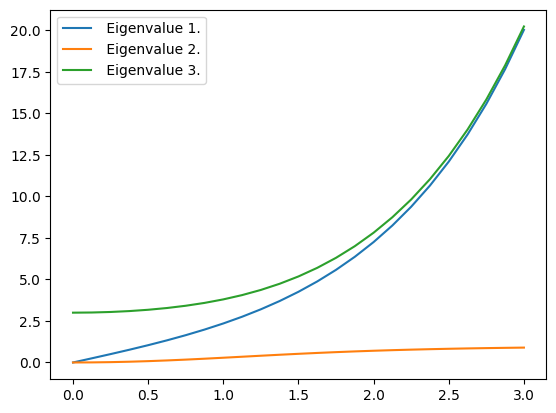

In [28]:
for j in range(3):
    plt.plot(K_vals,vals[j,:],label=f" Eigenvalue {j+1}.")
plt.legend()
plt.show()

#### Let's re-order by size

In [29]:
eigvals=np.array(eigvals)[[2,0,1]]
eig_vects= [eig_vects[2],eig_vects[0],eig_vects[1]]

In [30]:
K_vals = np.linspace(0,3,num=25)
vals = np.zeros((3,len(K_vals)))
for j in range(3):
    for count,K_val in enumerate(K_vals):
        vals[j,count] = np.real(complex(eigvals[j].evalf(subs={K:K_val})))

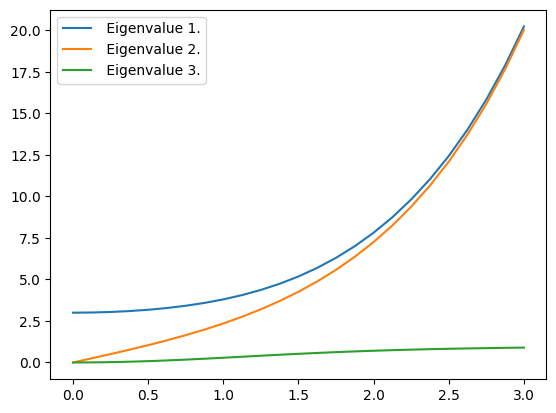

In [31]:
for j in range(3):
    plt.plot(K_vals,vals[j,:],label=f" Eigenvalue {j+1}.")
plt.legend()
plt.show()

#### Let's verify by comparing to Wolfram

![Screenshot 2024-12-19 232546.png](<attachment:Screenshot 2024-12-19 232546.png>)

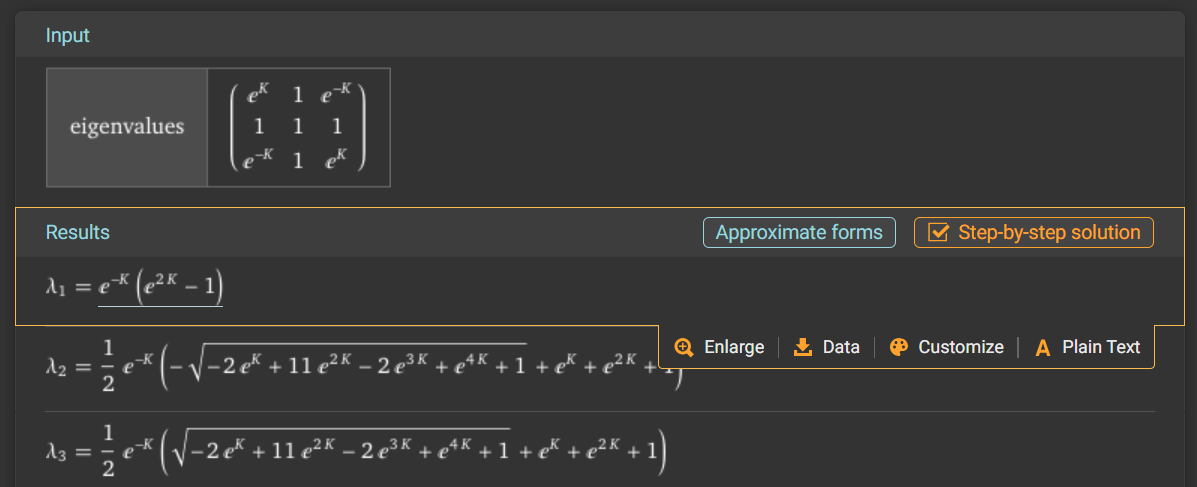

#### Now let's type those

In [32]:
discr = sp.sqrt(-2*sp.exp(K)+11*sp.exp(2*K)-2*sp.exp(3*K)+sp.exp(4*K)+1)
alt_1 = 1/2*sp.exp(-K)*(sp.exp(K)+sp.exp(2*K)+1+discr)
alt_2 = sp.exp(K)-sp.exp(-K) 
alt_3 =  1/2*sp.exp(-K)*(sp.exp(K)+sp.exp(2*K)+1-discr)
alt_list = [alt_1, alt_2, alt_3]
alt_vals = np.zeros((3,len(K_vals)))
for j in range(3):
    for count,K_val in enumerate(K_vals):
        alt_vals[j,count] = np.real(complex(alt_list[j].evalf(subs={K:K_val})))

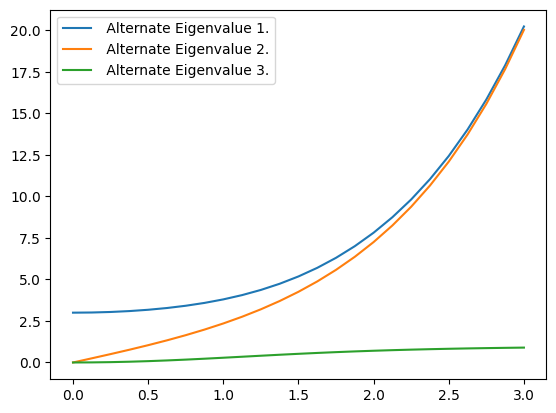

In [33]:
for j in range(3):
    plt.plot(K_vals,alt_vals[j,:],label=f" Alternate Eigenvalue {j+1}.")
plt.legend()
plt.show()

#### The plots appear the same, and as a numerical security check we can check that all values are the same.

In [34]:
np.allclose(vals,alt_vals)

True

#### Now we can obtain an expression for the free energy per site, namely

In [35]:
sp.log(alt_1)

log(0.5*(sqrt(exp(4*K) - 2*exp(3*K) + 11*exp(2*K) - 2*exp(K) + 1) + exp(2*K) + exp(K) + 1)*exp(-K))

#### To determine the correct scaling, we must transfer our observable matrix into the eigen-basis

In [36]:
W = eig_vects[0]
for j in range(1,3):
    W= sp.Matrix.row_join(W,eig_vects[j])

In [37]:
W.inv()*sp.Matrix(np.diag([1,0,-1]))*W

Matrix([
[ 0, -(sqrt(exp(4*K) - 2*exp(3*K) + 11*exp(2*K) - 2*exp(K) + 1) + exp(2*K) - exp(K) + 1)/(2*sqrt(exp(4*K) - 2*exp(3*K) + 11*exp(2*K) - 2*exp(K) + 1)),  0],
[-1,                                                                                                                                                0, -1],
[ 0, -(sqrt(exp(4*K) - 2*exp(3*K) + 11*exp(2*K) - 2*exp(K) + 1) - exp(2*K) + exp(K) - 1)/(2*sqrt(exp(4*K) - 2*exp(3*K) + 11*exp(2*K) - 2*exp(K) + 1)),  0]])

#### The main thing that matter is that the top element is non-zero. When multiplying out the matrices this is a term of the form $\lambda_1^{N-r}\lambda_2^r$. This term is absolutely dominate in the N>>r>>1 regime. We know that $Z~\lambda_1^N$ so the average correlation grows like $$\left(\frac{\lambda_1}{\lambda_2}\right)^r = e^{-r/\xi}\implies \xi = -\frac{1}{\ln\left(\lambda_1/\lambda_2\right)}$$

In [38]:
corr_2 = 1/sp.log(alt_1/alt_2)
corr_1 = -1/sp.log(sp.tanh(K))
corrs= [corr_1,corr_2]

#### We can then plot these again

In [39]:
K_vals = np.linspace(0,3,num=25)
corr_vals = np.zeros((3,len(K_vals)))
for j in range(2):
    for count,K_val in enumerate(K_vals):
        corr_vals[j,count] = np.real(complex(corrs[j].evalf(subs={K:K_val})))

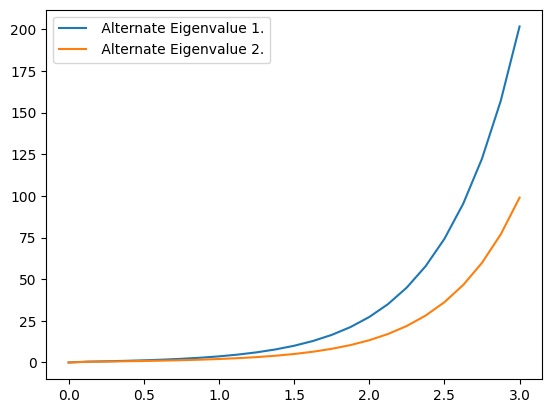

In [40]:
for j in range(2):
    plt.plot(K_vals,corr_vals[j,:],label=f" Alternate Eigenvalue {j+1}.")
plt.legend()
plt.show()

#### Intuitively, the correlation length is lower because there is always an "out" to maintain lower energy by sticking to 0 instead of fully flipping spin
#### Let's print it's expression

In [44]:
corr_2

1/log(0.5*(sqrt(exp(4*K) - 2*exp(3*K) + 11*exp(2*K) - 2*exp(K) + 1) + exp(2*K) + exp(K) + 1)*exp(-K)/(exp(K) - exp(-K)))